In [260]:
import pandas as pd
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data and eda

Ritchie, H., & Roser, M. (2020). CO₂ emissions. Our World in Data. Retrieved from https://ourworldindata.org/co2-emissions

In [261]:
# read the data
emissions = pd.read_csv('data/annual-co2-emissions-per-country.csv')

# rename column Annual CO₂ emissions to CO2 emissions
emissions = emissions.rename(columns={'Annual CO₂ emissions':'CO2 emissions'})

emissions.sample(10)

,Entity,Code,Year,CO2 emissions
5693,Cape Verde,CPV,2022,5.687780e+05
25736,South Sudan,SSD,1994,3.444840e+05
21798,Papua New Guinea,PNG,1773,0.000000e+00
11921,Guatemala,GTM,1959,1.237957e+06
27128,Togo,TGO,1975,3.114400e+05
359,Africa (GCP),NaN,1862,0.000000e+00
25954,Spain,ESP,2019,2.506608e+08
8107,Egypt,EGY,1927,5.679200e+05
4511,Brazil,BRA,1914,4.107344e+06
12641,High-income countries,NaN,1914,2.957562e+09


<Axes: xlabel='Year', ylabel='CO2 emissions'>

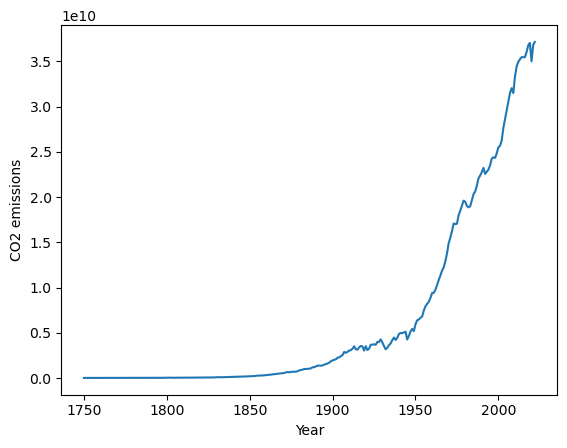

In [262]:
# filter the data to only include the world
emissions = emissions[emissions['Entity']=="World"]

# plot the data
sns.lineplot(data=emissions, x='Year', y='CO2 emissions')

In [263]:
# check data structure by looking at the first and last 5 rows
display(emissions.head())
display(emissions.tail())


,Entity,Code,Year,CO2 emissions
29769,World,OWID_WRL,1750,9305937.0
29770,World,OWID_WRL,1751,9407229.0
29771,World,OWID_WRL,1752,9505168.0
29772,World,OWID_WRL,1753,9610490.0
29773,World,OWID_WRL,1754,9733580.0


,Entity,Code,Year,CO2 emissions
30037,World,OWID_WRL,2018,3.676694e+10
30038,World,OWID_WRL,2019,3.704010e+10
30039,World,OWID_WRL,2020,3.500774e+10
30040,World,OWID_WRL,2021,3.681654e+10
30041,World,OWID_WRL,2022,3.714979e+10


Prepare data for prophet prediction model

In [264]:
# create a new dataframe with only the year and the CO2 emissions to use for the Prophet model
X = emissions.loc[:, ['Year','CO2 emissions']]
X.shape

(273, 2)

In [265]:
# rename columns so that the prophet model can be used
X.columns = ['ds', 'y']

# set year column as datetime
X['ds'] = pd.to_datetime(X['ds'], format='%Y')

Create prohet model and fit it to the data

In [266]:
# initialize the model
model = Prophet()

# fit the model on the last 50 years
model.fit(X.iloc[-50:])

16:50:20 - cmdstanpy - INFO - Chain [1] start processing


16:50:21 - cmdstanpy - INFO - Chain [1] done processing


# Prophet model evaluation

In [267]:
future = model.make_future_dataframe(periods=29, # predict the next 29 years
                                    freq='Y',
                                    include_history=False
                                    )
# print the last dates that will be predicted.
future.tail()

/home/mees/miniconda3/envs/tableau_server/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds
24,2046-12-31
25,2047-12-31
26,2048-12-31
27,2049-12-31
28,2050-12-31


In [268]:
# extract the predictions and store them in the forecast dataframe
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail

<bound method NDFrame.tail of            ds          yhat    yhat_lower    yhat_upper
0  2022-12-31  3.654067e+10  3.590371e+10  3.717448e+10
1  2023-12-31  3.627974e+10  3.561945e+10  3.695370e+10
2  2024-12-31  3.780971e+10  3.713639e+10  3.852048e+10
3  2025-12-31  3.776415e+10  3.712833e+10  3.848929e+10
4  2026-12-31  3.761066e+10  3.685093e+10  3.832500e+10
5  2027-12-31  3.734973e+10  3.653039e+10  3.807975e+10
6  2028-12-31  3.887971e+10  3.810923e+10  3.972089e+10
7  2029-12-31  3.883414e+10  3.793851e+10  3.977417e+10
8  2030-12-31  3.868065e+10  3.769546e+10  3.975782e+10
9  2031-12-31  3.841972e+10  3.733451e+10  3.949987e+10
10 2032-12-31  3.994970e+10  3.876421e+10  4.114722e+10
11 2033-12-31  3.990414e+10  3.867680e+10  4.128497e+10
12 2034-12-31  3.975065e+10  3.832327e+10  4.127582e+10
13 2035-12-31  3.948972e+10  3.797051e+10  4.113504e+10
14 2036-12-31  4.101969e+10  3.928226e+10  4.274696e+10
15 2037-12-31  4.097413e+10  3.914924e+10  4.293934e+10
16 2038-12-31  4.0

/home/mees/miniconda3/envs/tableau_server/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/mees/miniconda3/envs/tableau_server/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


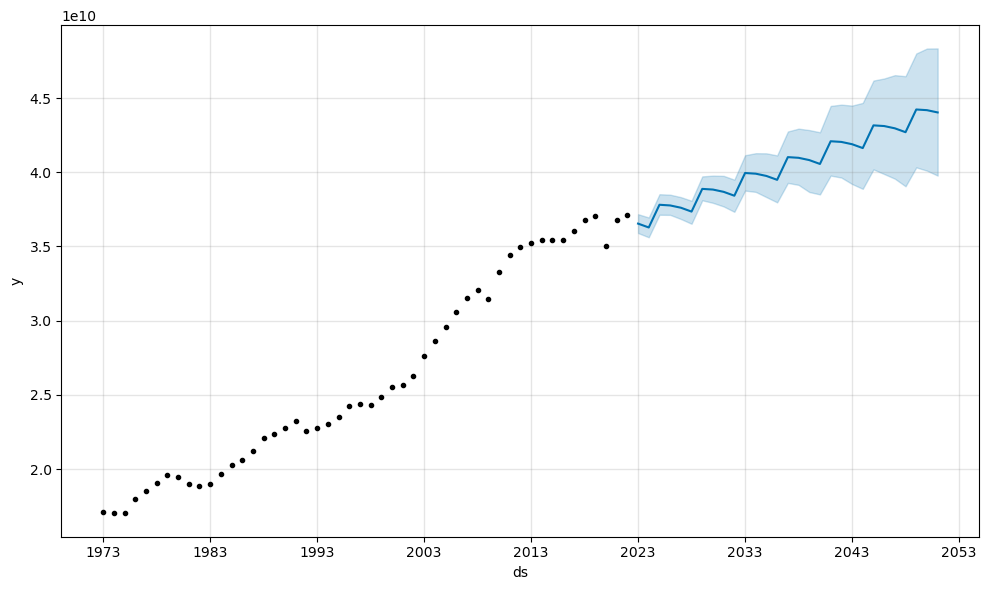

In [269]:
# evaluate the model by plotting the forecast
fig = model.plot(forecast)

/home/mees/miniconda3/envs/tableau_server/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/mees/miniconda3/envs/tableau_server/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/mees/miniconda3/envs/tableau_server/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing py

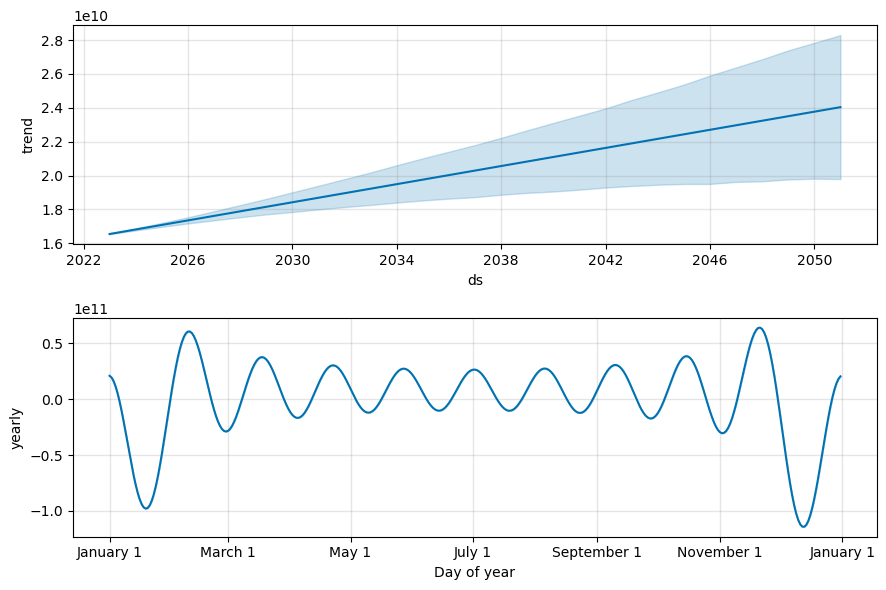

In [270]:
fig_components = model.plot_components(forecast)

In [271]:
# get year 
forecast['Year'] = forecast['ds'].dt.year
forecast.set_index('Year', inplace=True)
emissions_forecasted = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
# rename columns to CO2 emissions, CO2 emissions lower and CO2 emissions upper
emissions_forecasted.columns = ['CO2 emissions', 'CO2 emissions lower', 'CO2 emissions upper']

# remove first row 2022 as it is not a full year
emissions_forecasted = emissions_forecasted.iloc[1:]

display(emissions_forecasted[0:10])

,CO2 emissions,CO2 emissions lower,CO2 emissions upper
Year,,,
2023,3.627974e+10,3.561945e+10,3.695370e+10
2024,3.780971e+10,3.713639e+10,3.852048e+10
2025,3.776415e+10,3.712833e+10,3.848929e+10
2026,3.761066e+10,3.685093e+10,3.832500e+10
2027,3.734973e+10,3.653039e+10,3.807975e+10
2028,3.887971e+10,3.810923e+10,3.972089e+10
2029,3.883414e+10,3.793851e+10,3.977417e+10
2030,3.868065e+10,3.769546e+10,3.975782e+10
2031,3.841972e+10,3.733451e+10,3.949987e+10


In [272]:
emissions.set_index('Year', inplace=True)
emissions = emissions[['CO2 emissions']]
emissions.tail()

,CO2 emissions
Year,
2018,3.676694e+10
2019,3.704010e+10
2020,3.500774e+10
2021,3.681654e+10
2022,3.714979e+10


In [273]:
combined = pd.concat([emissions, emissions_forecasted], axis=0, keys=['Historical', 'Predicted'])
combined.index.names = ['Source', 'Year']
combined.reset_index(inplace=True)

combined.to_csv('CO2 prediction.csv', index=False)
combined

,Source,Year,CO2 emissions,CO2 emissions lower,CO2 emissions upper
0,Historical,1750,9.305937e+06,NaN,NaN
1,Historical,1751,9.407229e+06,NaN,NaN
2,Historical,1752,9.505168e+06,NaN,NaN
3,Historical,1753,9.610490e+06,NaN,NaN
4,Historical,1754,9.733580e+06,NaN,NaN
...,...,...,...,...,...
296,Predicted,2046,4.296063e+10,3.956642e+10,4.654271e+10
297,Predicted,2047,4.269970e+10,3.905554e+10,4.647244e+10
298,Predicted,2048,4.422968e+10,4.032842e+10,4.800201e+10
299,Predicted,2049,4.418411e+10,4.010906e+10,4.833883e+10


In [278]:
# melt CO2 emissions, CO2 emissions lower and CO2 emissions upper into one column 
# so that it can be used for visualization in Tableau
combined_melted = pd.melt(combined, id_vars=['Source', 'Year'], var_name='Line', value_name='CO2 emissions value')
combined_melted.to_csv('CO2 prediction_melted.csv', index=False)
combined_melted


,Source,Year,Line,CO2 emissions value
0,Historical,1750,CO2 emissions,9.305937e+06
1,Historical,1751,CO2 emissions,9.407229e+06
2,Historical,1752,CO2 emissions,9.505168e+06
3,Historical,1753,CO2 emissions,9.610490e+06
4,Historical,1754,CO2 emissions,9.733580e+06
...,...,...,...,...
898,Predicted,2046,CO2 emissions upper,4.654271e+10
899,Predicted,2047,CO2 emissions upper,4.647244e+10
900,Predicted,2048,CO2 emissions upper,4.800201e+10
901,Predicted,2049,CO2 emissions upper,4.833883e+10
